<a href="https://colab.research.google.com/github/YeonKang/Tensorflow-with-Colab/blob/master/Lab3_Linear_Resgrssion_and_How_to_minimize_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.0


**Hypothesis and Cost**

$H(x)=Wx+b$, $Cost(W,b)=\frac{1}{m}\Sigma^m_{i=1}(Wx_i-y_i)^2$

**Simplified hypothesis** 

$H(x)=Wx$, $Cost(W)=\frac{1}{m}\Sigma^m_{i=1}(Wx_i-y_i)^2$

**Cost function in pure Python**

In [7]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


**Cost function in TensorFlow**

In [10]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


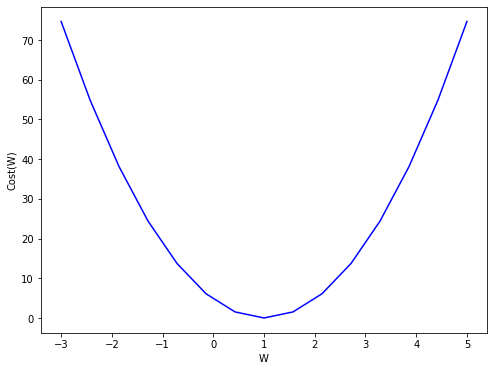

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

**Gradient descent formal definition**

$cost(W)={1\over m}\Sigma^m_{i=1}(Wx_i-y_i)^2$

$W:=W-\alpha{1\over m}\Sigma^m_{i=1}(W(x_i)-y_i)x_i$ ($\alpha$ = learning rate)

In [2]:
tf.random.set_seed(0)  #for reproducibility

In [11]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |   150.9833 |   6.422578
   10 |    58.0530 |   4.362432
   20 |    22.3213 |   3.084977
   30 |     8.5825 |   2.292853
   40 |     3.3000 |   1.801672
   50 |     1.2688 |   1.497101
   60 |     0.4879 |   1.308242
   70 |     0.1876 |   1.191135
   80 |     0.0721 |   1.118519
   90 |     0.0277 |   1.073491
  100 |     0.0107 |   1.045570
  110 |     0.0041 |   1.028257
  120 |     0.0016 |   1.017522
  130 |     0.0006 |   1.010865
  140 |     0.0002 |   1.006737
  150 |     0.0001 |   1.004178
  160 |     0.0000 |   1.002591
  170 |     0.0000 |   1.001606
  180 |     0.0000 |   1.000996
  190 |     0.0000 |   1.000618
  200 |     0.0000 |   1.000383
  210 |     0.0000 |   1.000237
  220 |     0.0000 |   1.000147
  230 |     0.0000 |   1.000091
  240 |     0.0000 |   1.000057
  250 |     0.0000 |   1.000035
  260 |     0.0000 |   1.000022
  270 |     0.0000 |   1.000014
  280 |     0.0000 |   1.000008
  290 |     0.0000 |   1.000005


In [12]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.000017], shape=(1,), dtype=float32)
tf.Tensor([2.5000086], shape=(1,), dtype=float32)


In [14]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004
